[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mahad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


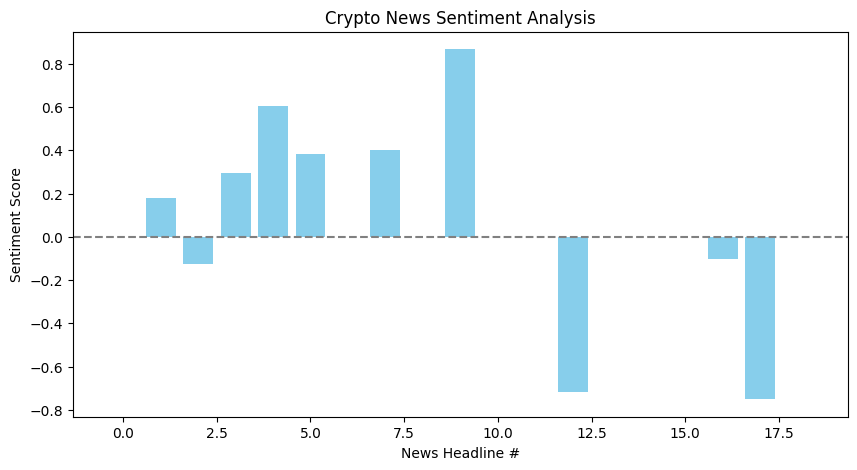

In [21]:
#Installing Dependencies
import requests
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import nltk
import pandas as pd
import numpy as np


#Download StopWords
nltk.download('punkt')

# 1. Get News
api_key = '831100cfdccb4cd281a29ed2f19986de'
query = 'Indian Stock Market'
url = f'https://newsapi.org/v2/everything?q={query}&language=en&sortBy=publishedAt&pageSize=20&apiKey={api_key}'

response = requests.get(url)
articles = response.json()['articles']
titles = [article['title'] for article in articles]

# === Prepare data for CSV ===
news_data = [{
    'Title': article['title'],
    'Source': article['source']['name'],
    'PublishedAt': article['publishedAt']
} for article in articles]

# === Save to CSV ===
df = pd.DataFrame(news_data)
df.to_csv('crypto_news_sentiment.csv', index=False)


#2. Perform Sentiment Analysis

analyzer = SentimentIntensityAnalyzer()
sentiments = []

for title in titles:
    score = analyzer.polarity_scores(title)
    sentiments.append(score['compound']) #compound score ranges from -1(neg) to +1(pos)


#3. Plot Sentiment Scores

plt.figure(figsize=(10,5))
plt.bar(range(len(sentiments)), sentiments, color='skyblue')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Crypto News Sentiment Analysis")
plt.xlabel("News Headline #")
plt.ylabel("Sentiment Score")
plt.show()

In [22]:
#4. Calculate average sentiment score
average_sentiment = np.mean(sentiments)
print(f"\nAverage Sentiment Score: {average_sentiment:.2f}")

#5. Decision Based on Sentiment

if average_sentiment > 0.2:
    print("Sentiment is Positive -> Signal: BUY")
elif average_sentiment < -0.2:
    print("Sentiment is Negative -> Signal: SELL")
else:
    print("Sentiment is Neutral -> Signal: HOLD")


Average Sentiment Score: 0.05
Sentiment is Neutral -> Signal: HOLD
